<a href="https://colab.research.google.com/github/aadhamashraf/DSAI-307-Final-Project/blob/main/DSAI-307-Final-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing and Intiating Modules**

In [ ]:
install.packages("colorspace")
install.packages("tidyverse")
install.packages("car") # XYZ

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’




In [ ]:
library(tidyverse) # metapackage of all tidyverse packages
library(car) # for the vif function to check for multicollinearity
library(dplyr) # for data manipulation
library(ggplot2) # for data visualization
library(readr) # for data import
library(tidyr) # for data tidying

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode


The following object is masked from 'package:purrr':

    some




In [ ]:
# importing utilities.R
source("utilities.R")

# **Obtain the Data Set**

In [ ]:
diabetes_data <- read_csv("diabetes.csv")

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
diabetes_data

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31.0,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1


**Dataset Columns:**
1. Pregnancies: Number of times the patient has been pregnant.
2. Glucose: Plasma glucose concentration after a 2-hour oral glucose tolerance test.
3. BloodPressure: Diastolic blood pressure (mm Hg).
4. SkinThickness: Triceps skinfold thickness (mm).
5. Insulin: 2-hour serum insulin (mu U/ml).
6. BMI: Body mass index (weight in kg/(height in m)^2).
7. DiabetesPedigreeFunction: A function that represents the patient’s diabetes pedigree (i.e., likelihood of diabetes based on family history).
8. Age: Age of the patient (years).
9. Outcome: Binary outcome (0 or 1) where 1 indicates the presence of diabetes and 0 indicates the absence.

In [ ]:
colnames(diabetes_data)

[1] "Pregnancies"              "Glucose"                 
[3] "BloodPressure"            "SkinThickness"           
[5] "Insulin"                  "BMI"                     
[7] "DiabetesPedigreeFunction" "Age"                     
[9] "Outcome"

In [ ]:
diabetes_data %>%
summarise_all(funs(sum(is.na(.))))

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0


# **PART 1: Exploratory Analysis:**

1. The average glucose levels among patients with and without diabetes.
2. The average age of patients with and without diabetes.
3. The average blood pressure measurements across diabetic and non-diabetic groups.
4. The average BMI of diabetic versus non-diabetic patients.
5. The rate of diabetes among patients in the dataset.
6. The distribution of BMI values among all patients.
7. The distribution of Diabetes Pedigree Function (DPF) values for diabetic and non-diabetic patients.
8. The relationship between the number of pregnancies and diabetes occurrence.
9. The correlation between glucose levels and BMI.
10. The trend of glucose levels with age among diabetic and non-diabetic patients.


**The average glucose levels among patients with and without diabetes.**

In [ ]:
diabetes_data %>%
  group_by(Outcome) %>%
  summarise(Average_Glucose = mean(Glucose)) %>%
  mutate(Outcome = ifelse(Outcome == 0, "Without Diabetes", "Diabetes"))

Outcome,Average_Glucose
<chr>,<dbl>
Without Diabetes,109.9800
Diabetes,141.2575


**The average age of patients with and without diabetes.**

In [ ]:
diabetes_data %>%
  group_by(Outcome) %>%
  summarise(Average_Age = floor(mean(Age))) %>%
  mutate(Outcome = ifelse(Outcome == 0, "Without Diabetes", "Diabetes"))

Outcome,mean_age
<chr>,<dbl>
Without Diabetes,31
Diabetes,37


**The average blood pressure measurements across diabetic and non-diabetic groups.**

In [ ]:
diabetes_data %>%
  group_by(Outcome) %>%
  summarise(Average_Blood_Pressure = mean(BloodPressure)) %>%
  mutate(Outcome = ifelse(Outcome == 0, "Without Diabetes", "Diabetes"))

Outcome,mean_blood_pressure
<chr>,<dbl>
Without Diabetes,68.18400
Diabetes,70.82463


**The average BMI of diabetic versus non-diabetic patients.**

In [ ]:
diabetes_data %>%
  group_by(Outcome) %>%
  summarise(Average_BMI = mean(BMI)) %>%
  mutate(Outcome = ifelse(Outcome == 0, "Without Diabetes", "Diabetes"))

**The rate of diabetes among patients in the dataset.**

In [ ]:
diabetes_rate <- diabetes_data %>%
  summarise(Diabetes_Rate = mean(Outcome) * 100)
diabetes_rate

Diabetes_Rate
<dbl>
34.89583


**The distribution of BMI values among all patients.**

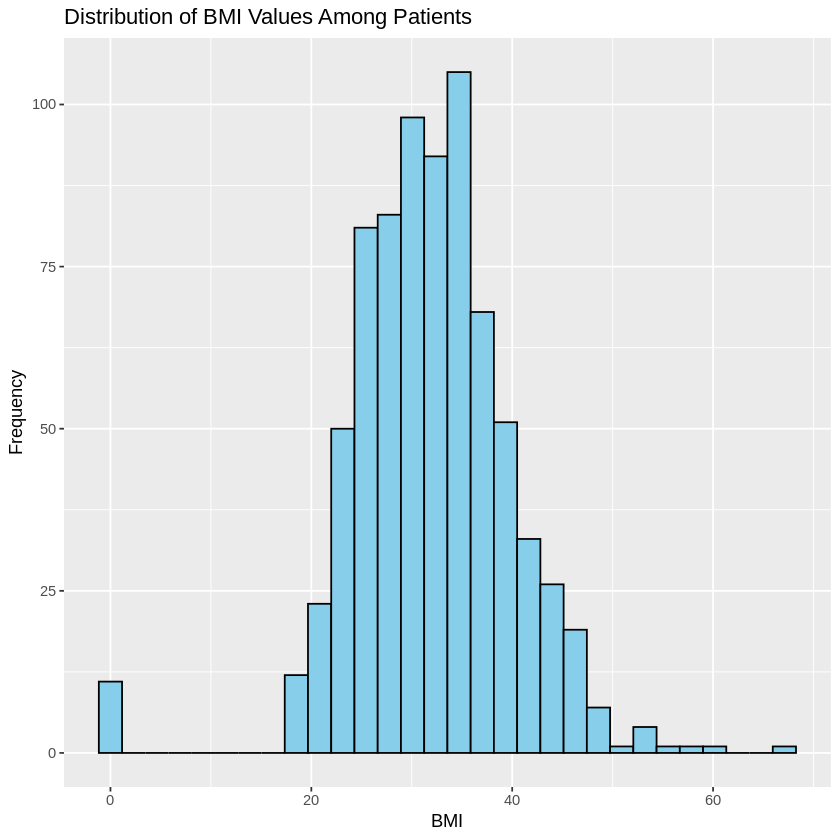

In [ ]:
ggplot(diabetes_data, aes(x = BMI)) +
  geom_histogram(bins = 30, fill = "#A4A4A4", color = "darkred") +
  labs(title = "Distribution of BMI Values", x = "BMI", y = "Frequency") +
  theme(plot.title = element_text(hjust = 0.5),axis.title.x = element_text(hjust = 0.5), axis.title.y = element_text(hjust = 0.5))

**The distribution of Diabetes Pedigree Function (DPF) values for diabetic and non-diabetic patients.**

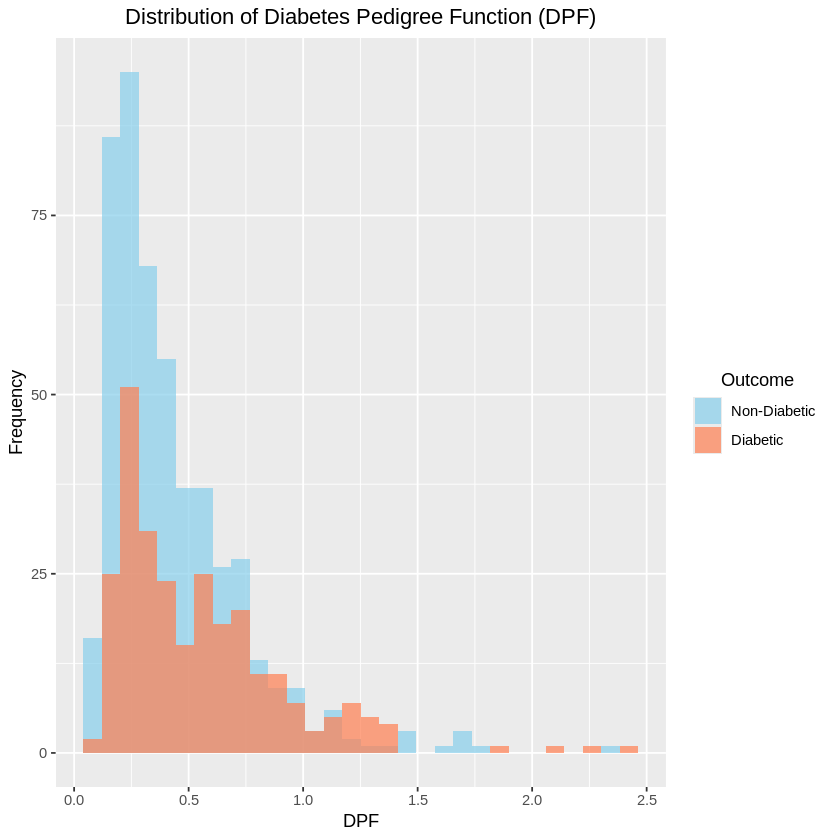

In [ ]:
ggplot(diabetes_data, aes(x = DiabetesPedigreeFunction, fill = as.factor(Outcome))) +
  geom_histogram(bins = 30, , alpha = 0.7 ,position = "identity") +
  labs(title = "Distribution of Diabetes Pedigree Function (DPF)", x = "DPF", y = "Frequency", fill = "Outcome") +
  scale_fill_manual(values = c("0" = "skyblue", "1" = "coral"), labels = c("Non-Diabetic", "Diabetic")) +
  theme(plot.title = element_text(hjust = 0.5),axis.title.x = element_text(hjust = 0.5),axis.title.y = element_text(hjust = 0.5),legend.title = element_text(hjust = 0.5))

**The relationship between the number of pregnancies and diabetes occurrence.**

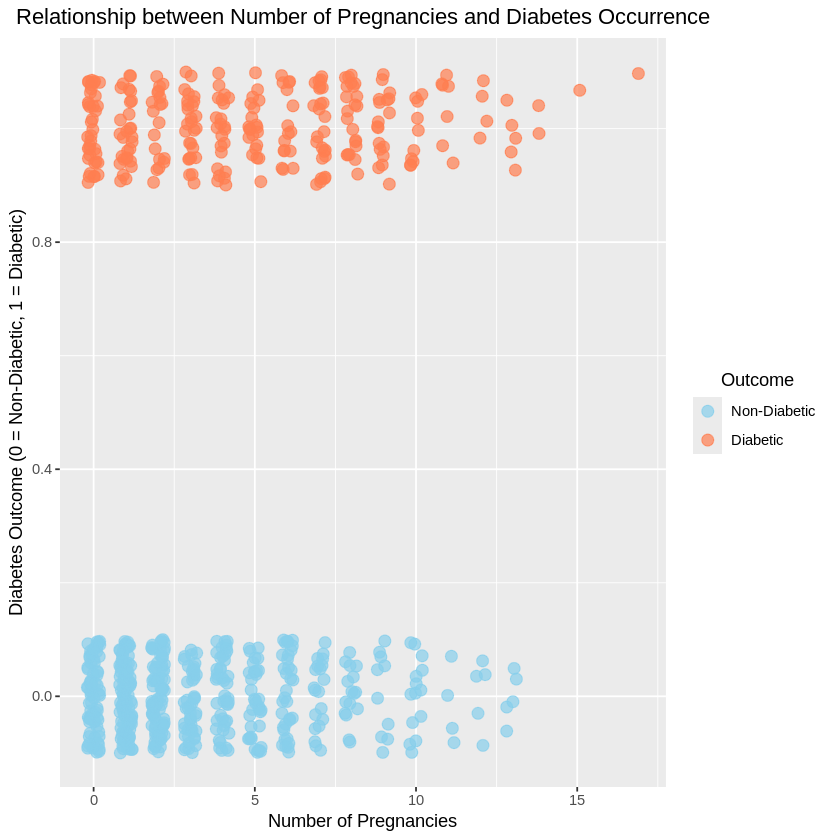

In [ ]:
ggplot(diabetes_data, aes(x = Pregnancies, y = Outcome, color = as.factor(Outcome))) +
  geom_jitter(alpha = 0.7, size = 3, width = 0.2, height = 0.1) +
  labs(
    title = "Relationship between Number of Pregnancies and Diabetes Occurrence",
    x = "Number of Pregnancies",
    y = "Diabetes Outcome (0 = Non-Diabetic, 1 = Diabetic)",
    color = "Outcome"
  ) +
  scale_color_manual(
    values = c("0" = "skyblue", "1" = "coral"),
    labels = c("Non-Diabetic", "Diabetic")
  ) +
  theme(
    plot.title = element_text(hjust = 0.5),
    axis.title.x = element_text(hjust = 0.5),
    axis.title.y = element_text(hjust = 0.5),
    legend.title = element_text(hjust = 0.5)
  )


**The correlation between glucose levels and BMI.**

In [ ]:
correlation_glucose_bmi <- cor(diabetes_data$Glucose, diabetes_data$BMI)
print(paste("Correlation between glucose levels and BMI:", correlation_glucose_bmi))

[1] "Correlation between glucose levels and BMI: 0.221071069458983"


**The trend of glucose levels with age among diabetic and non-diabetic patients**

`geom_smooth()` using formula = 'y ~ x'


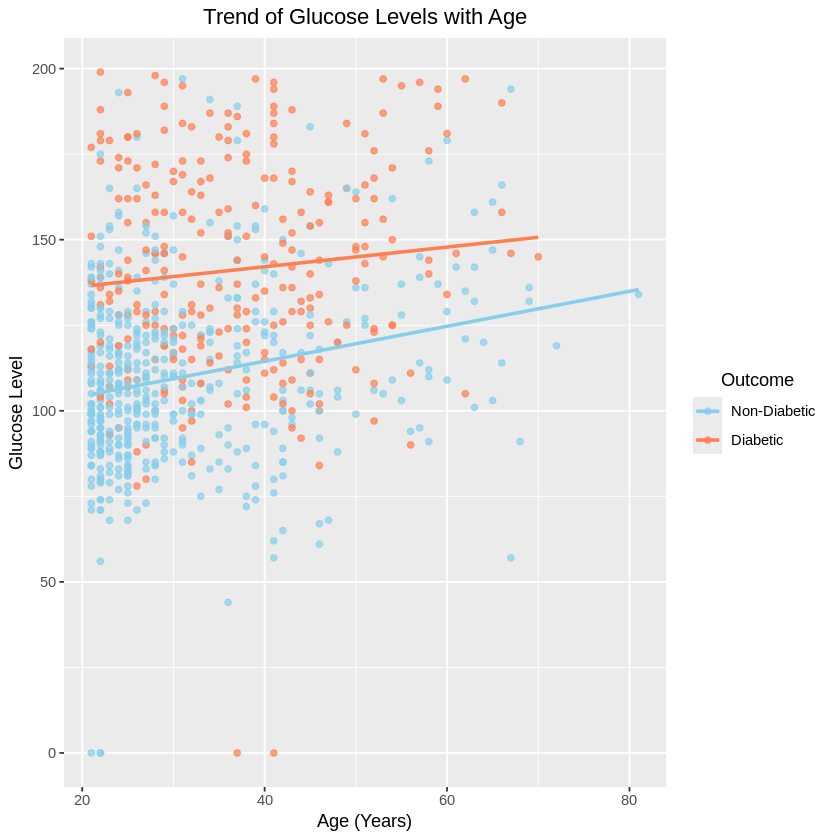

In [ ]:
ggplot(diabetes_data, aes(x = Age, y = Glucose, color = as.factor(Outcome))) +
  geom_point(alpha = 0.7) +
  geom_smooth(method = "lm", se = FALSE) +
  labs(
    title = "Trend of Glucose Levels with Age",x = "Age (Years)",y = "Glucose Level",color = "Outcome") +
    scale_color_manual(values = c("0" = "skyblue", "1" = "coral"),labels = c("Non-Diabetic", "Diabetic")) +
  theme(
    plot.title = element_text(hjust = 0.5),
    axis.title.x = element_text(hjust = 0.5),
    axis.title.y = element_text(hjust = 0.5),
    legend.title = element_text(hjust = 0.5)
  )

# **PART 2: Answering Questions:**

##2.0 Preprocessing required to answer the questions

In [ ]:
diabetes_data <- read_csv("/content/diabetes.csv")

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
diabetes_data <- diabetes_data %>%
  mutate(Outcome = ifelse(Outcome == 0, "Not Diabetic", "Diabetic"))

In [ ]:
diabetes_data <- na.omit(diabetes_data)

In [ ]:
diabetes_data <- diabetes_data %>%
  filter(Glucose != 0 & BloodPressure != 0 & SkinThickness != 0 & Insulin != 0 & BMI != 0)

In [ ]:
set.seed(42)
diabetes_data <- diabetes_data %>%
  group_by(Outcome) %>%
  sample_n(min(table(diabetes_data$Outcome))) %>%
  ungroup()

## **2.1 Write down the answers to those analytical questions.**

1. Are higher glucose levels associated with a greater likelihood of diabetes?

2. Are patients with high glucose concentrations also likely to have higher BMI values?

3. Are patients with a higher number of pregnancies at greater risk of developing diabetes?

4. Are older patients more likely to have higher insulin concentrations and blood glucose levels?

5. Can you identify common “risk profiles” for diabetic patients based on key metrics (glucose, BMI, age, etc.)?


###2.1.1

In [ ]:
t_test_result = t.test(diabetes_data$Glucose ~ diabetes_data$Outcome)
print(t_test_result)


	Welch Two Sample t-test

data:  diabetes_data$Glucose by diabetes_data$Outcome
t = 9.8689, df = 246.27, p-value < 2.2e-16
alternative hypothesis: true difference in means between group Diabetic and group Not Diabetic is not equal to 0
95 percent confidence interval:
 26.48772 39.69690
sample estimates:
    mean in group Diabetic mean in group Not Diabetic 
                  145.1923                   112.1000 



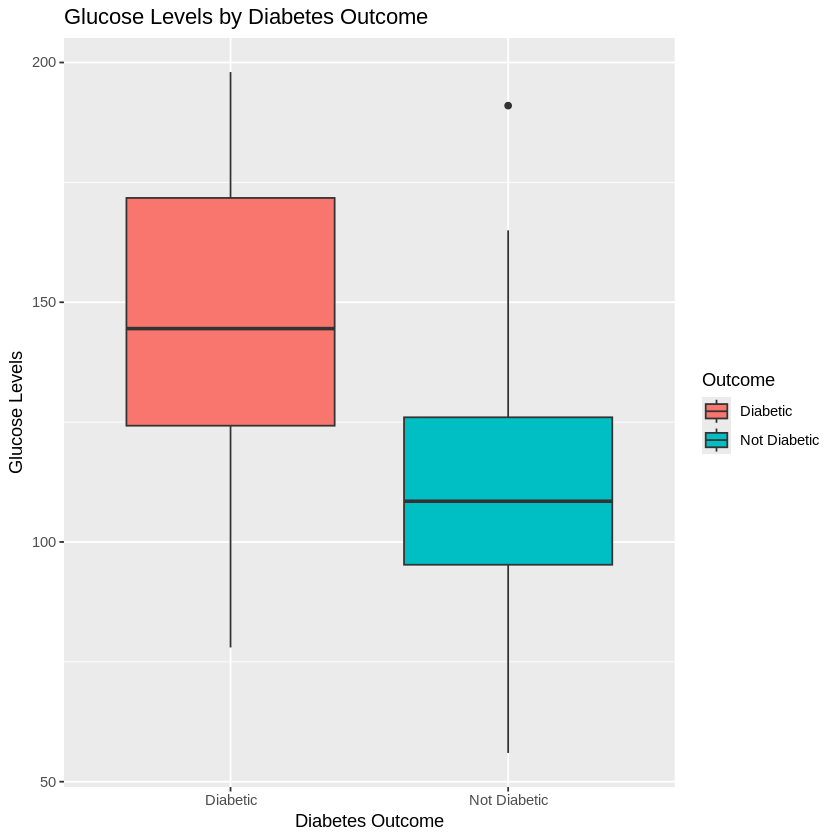

In [ ]:
ggplot(diabetes_data, aes(x = as.factor(Outcome), y = Glucose, fill = Outcome)) +
  geom_boxplot() +
  labs(x = "Diabetes Outcome", y = "Glucose Levels", title = "Glucose Levels by Diabetes Outcome")

* The p-value being almost 0 from the t-test indicates a significant difference in glucose levels between diabetic and non-diabetic groups.
* The interquartile range (IQR) is notably higher for diabetic patients, suggesting that higher glucose levels are associated with diabetes.

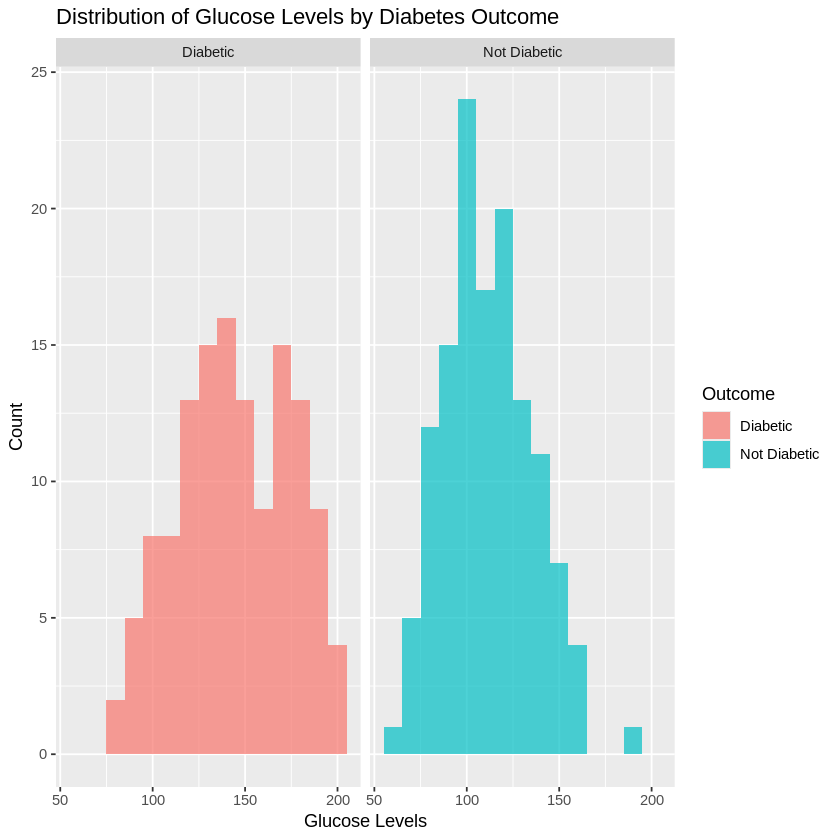

In [ ]:
ggplot(diabetes_data, aes(x = Glucose, fill = Outcome)) +
  geom_histogram(binwidth = 10, alpha = 0.7) +
  labs(x = "Glucose Levels", y = "Count", title = "Distribution of Glucose Levels by Diabetes Outcome") +
  facet_wrap(~Outcome)


The histogram for diabetic patients is right-skewed, reinforcing that higher glucose levels are more prevalent among diabetics.

###2.1.2

In [ ]:
correlation_glucose_bmi <- cor(diabetes_data$Glucose, diabetes_data$BMI)
print(correlation_glucose_bmi)

[1] 0.1732431


`geom_smooth()` using formula = 'y ~ x'


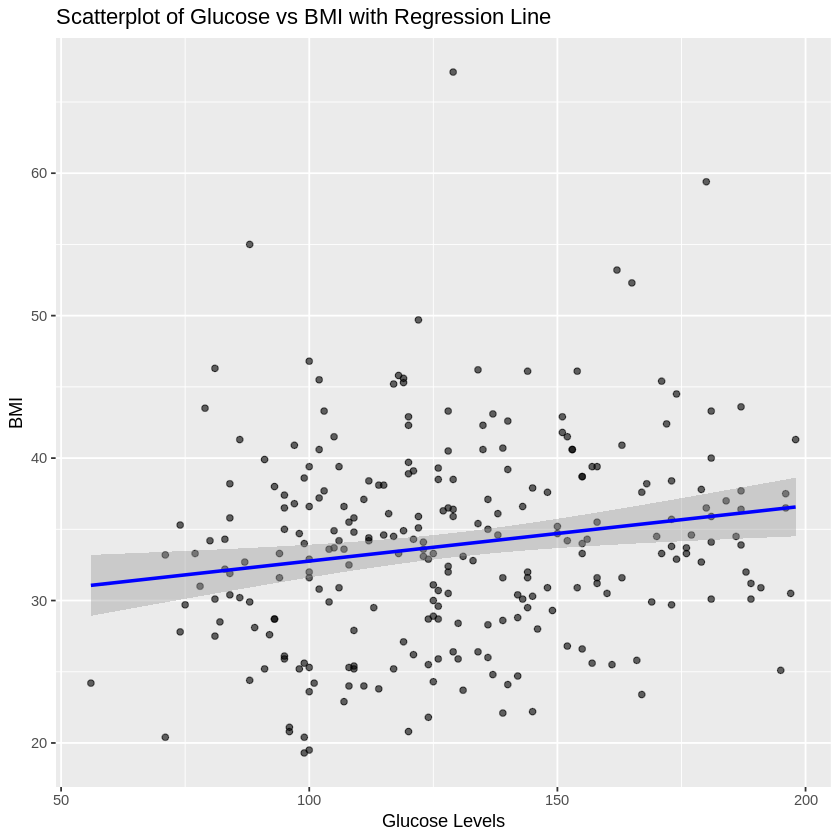

In [ ]:
ggplot(diabetes_data, aes(x = Glucose, y = BMI)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", color = "blue") +
  labs(x = "Glucose Levels", y = "BMI", title = "Scatterplot of Glucose vs BMI with Regression Line")

* There is a moderate positive correlation (r = 0.17) between glucose levels and BMI, suggesting that higher BMI may be linked to elevated glucose levels, though the relationship is not strongly correlated.
* The positive slope of the line plotted over the scatter plot further illustrates this direct relationship between glucose levels and BMI.

###2.1.3

In [ ]:
t_test_preg <- t.test(diabetes_data$Pregnancies ~ diabetes_data$Outcome)
print(t_test_preg)


	Welch Two Sample t-test

data:  diabetes_data$Pregnancies by diabetes_data$Outcome
t = 4.2361, df = 232.75, p-value = 3.278e-05
alternative hypothesis: true difference in means between group Diabetic and group Not Diabetic is not equal to 0
95 percent confidence interval:
 0.9545837 2.6146471
sample estimates:
    mean in group Diabetic mean in group Not Diabetic 
                  4.469231                   2.684615 



In [ ]:
diabetes_data$PregnancyGroup <- cut(diabetes_data$Pregnancies, breaks = c(-Inf, 2, 5, Inf), labels = c("0-2", "3-5", "6+"))
pregnancy_table <- table(diabetes_data$PregnancyGroup, diabetes_data$Outcome)
chi_square_result <- chisq.test(pregnancy_table)
print(chi_square_result)


	Pearson's Chi-squared test

data:  pregnancy_table
X-squared = 17.216, df = 2, p-value = 0.0001827



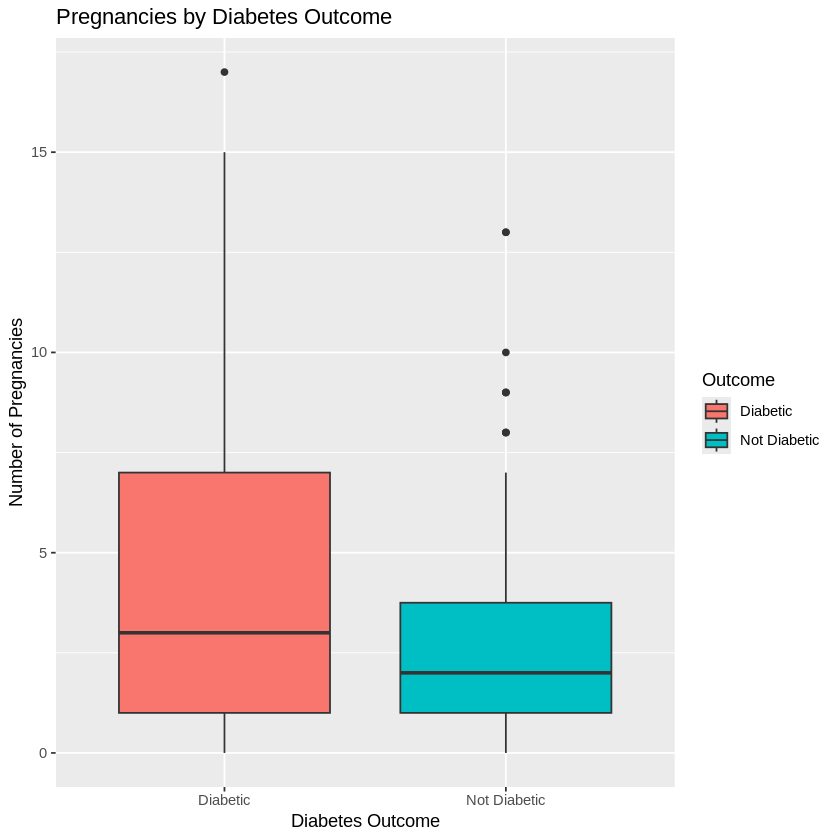

In [ ]:
ggplot(diabetes_data, aes(x = as.factor(Outcome), y = Pregnancies, fill = Outcome)) +
  geom_boxplot() +
  labs(x = "Diabetes Outcome", y = "Number of Pregnancies", title = "Pregnancies by Diabetes Outcome")

* A significant difference exists between the mean pregnancy counts for diabetic (4.47) and non-diabetic (2.68) groups, supported by a p-value nearing zero (p = 3.278e-05).
* The Chi-Square test confirms that pregnancy count is significantly associated with diabetes risk (p-value = 0.0001827).
* The box plot highlights a higher interquartile range (IQR) for the number of pregnancies in diabetic patients, further indicating a strong relationship between pregnancy count and diabetes risk.

###2.1.4

In [ ]:
correlation_age_glucose <- cor(diabetes_data$Age, diabetes_data$Glucose)
correlation_age_insulin <- cor(diabetes_data$Age, diabetes_data$Insulin)
print(correlation_age_glucose)
print(correlation_age_insulin)

[1] 0.3687271
[1] 0.2244109


`geom_smooth()` using formula = 'y ~ x'


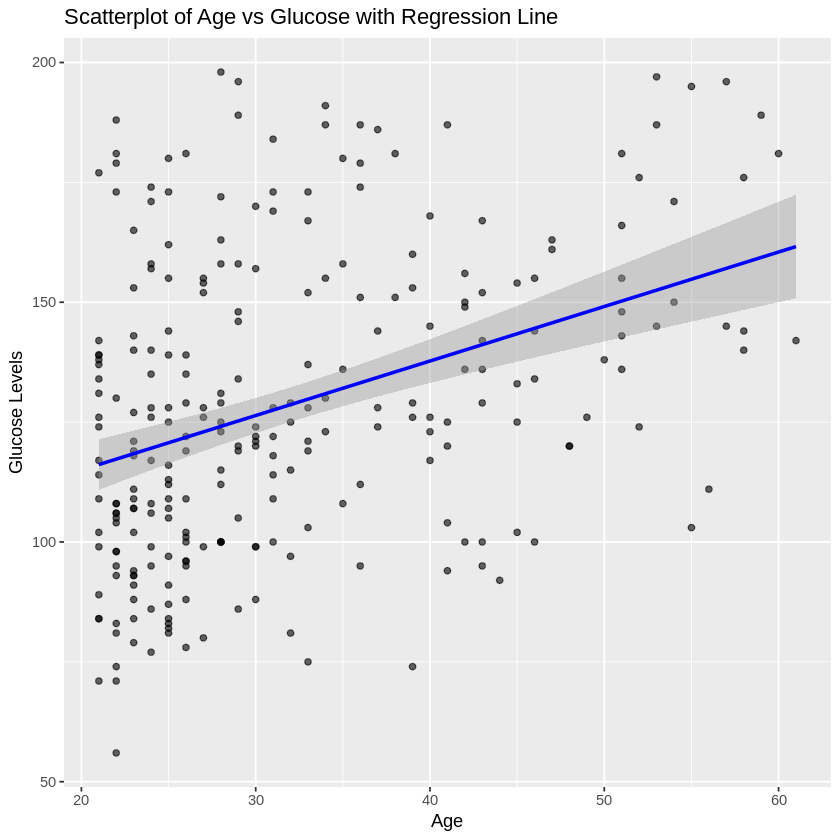

In [ ]:
ggplot(diabetes_data, aes(x = Age, y = Glucose)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", color = "blue") +
  labs(x = "Age", y = "Glucose Levels", title = "Scatterplot of Age vs Glucose with Regression Line")


`geom_smooth()` using formula = 'y ~ x'


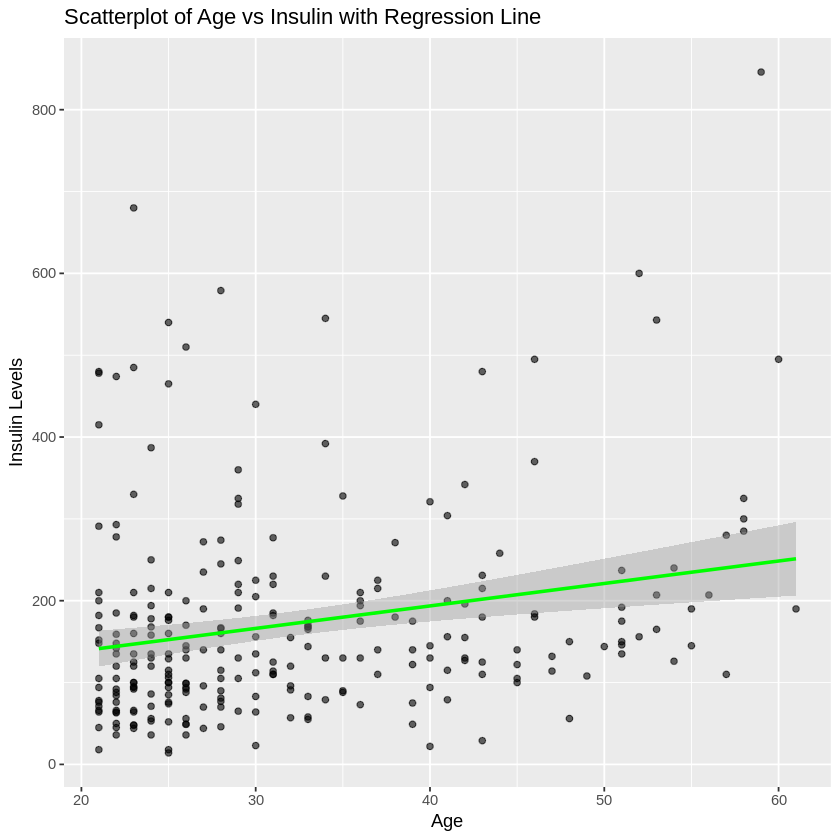

In [ ]:
ggplot(diabetes_data, aes(x = Age, y = Insulin)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", color = "green") +
  labs(x = "Age", y = "Insulin Levels", title = "Scatterplot of Age vs Insulin with Regression Line")

Age positively correlates with both glucose and insulin levels, indicating that older individuals have higher levels potentially increasing diabetes risk.

###2.1.5

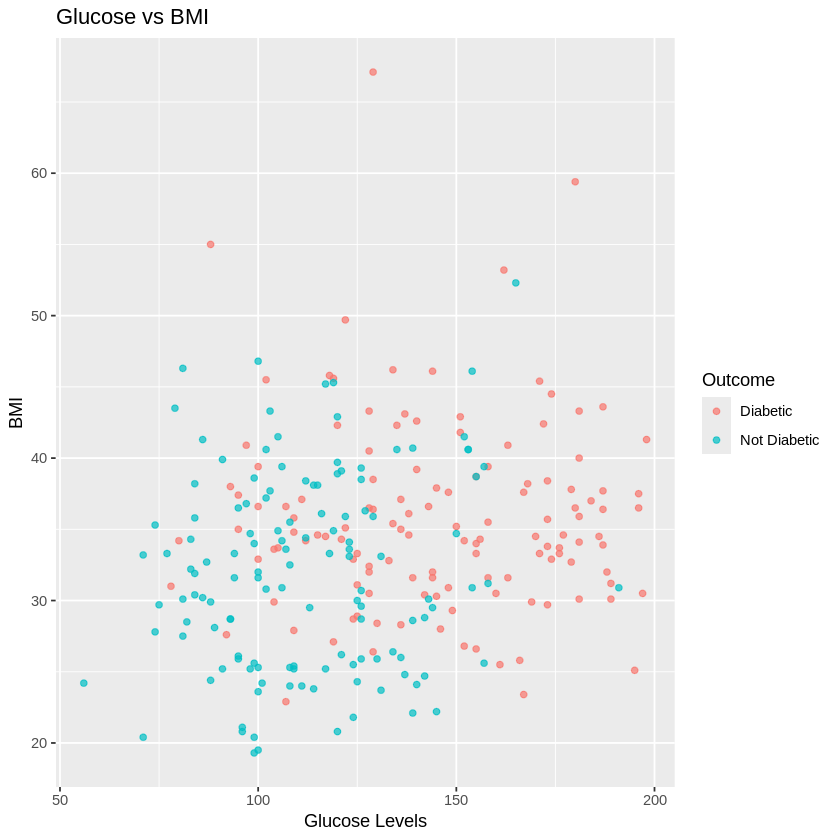

In [ ]:
ggplot(diabetes_data, aes(x = Glucose, y = BMI, color = Outcome)) +
  geom_point(alpha = 0.7) +
  labs(
    title = "Glucose vs BMI",
    x = "Glucose Levels",
    y = "BMI"
  )

* Diabetic individuals are generally clustered around higher glucose levels (greater than 125).
* BMI is more variable among both diabetic and non-diabetic individuals, but diabetics tend to have higher BMI on average.

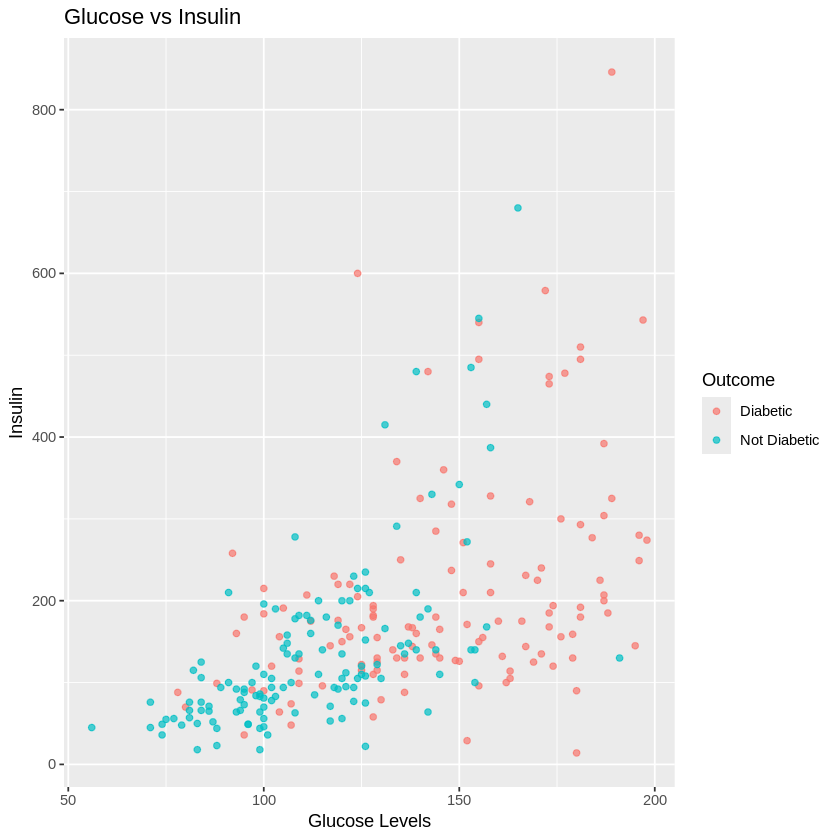

In [ ]:
ggplot(diabetes_data, aes(x = Glucose, y = Insulin, color = Outcome)) +
  geom_point(alpha = 0.7) +
  labs(
    title = "Glucose vs Insulin",
    x = "Glucose Levels",
    y = "Insulin"
  )


Higher glucose levels strongly correlate with elevated insulin levels, with diabetic individuals predominantly exhibiting both markers in higher ranges. Non-diabetic individuals are clustered in lower range. This can be considered a method for profiling diabetic patients

## **2 .2 Come up with 5 more bivariate/multivariate analysis questions and similarly answer each with appropriate visuals and commentary.**


1.   Are higher blood pressure levels associated with greater risk of diabetes?
2.   Is there a correlation between insulin levels and BMI?
3. How do age trends differ with glucose and BMI between diabetic and non-diabetic groups?
4. Is there a significant difference in skin thickness between diabetic and non-diabetic individuals?
5. How does pregnancy group distribution vary with BMI and glucose by diabetes outcome?



###2.2.1

In [ ]:
t_test_bp <- t.test(diabetes_data$BloodPressure ~ diabetes_data$Outcome)
print(t_test_bp)


	Welch Two Sample t-test

data:  diabetes_data$BloodPressure by diabetes_data$Outcome
t = 3.7969, df = 253.32, p-value = 0.0001834
alternative hypothesis: true difference in means between group Diabetic and group Not Diabetic is not equal to 0
95 percent confidence interval:
 2.769443 8.738250
sample estimates:
    mean in group Diabetic mean in group Not Diabetic 
                  74.07692                   68.32308 



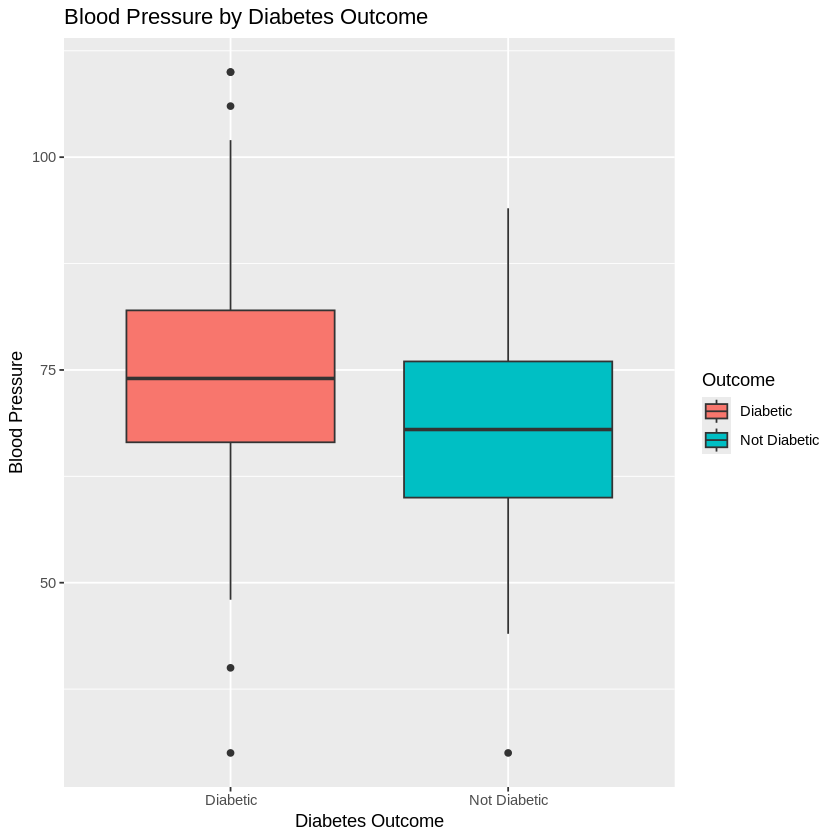

In [ ]:
ggplot(diabetes_data, aes(x = as.factor(Outcome), y = BloodPressure, fill = Outcome)) +
  geom_boxplot() +
  labs(x = "Diabetes Outcome", y = "Blood Pressure", title = "Blood Pressure by Diabetes Outcome")


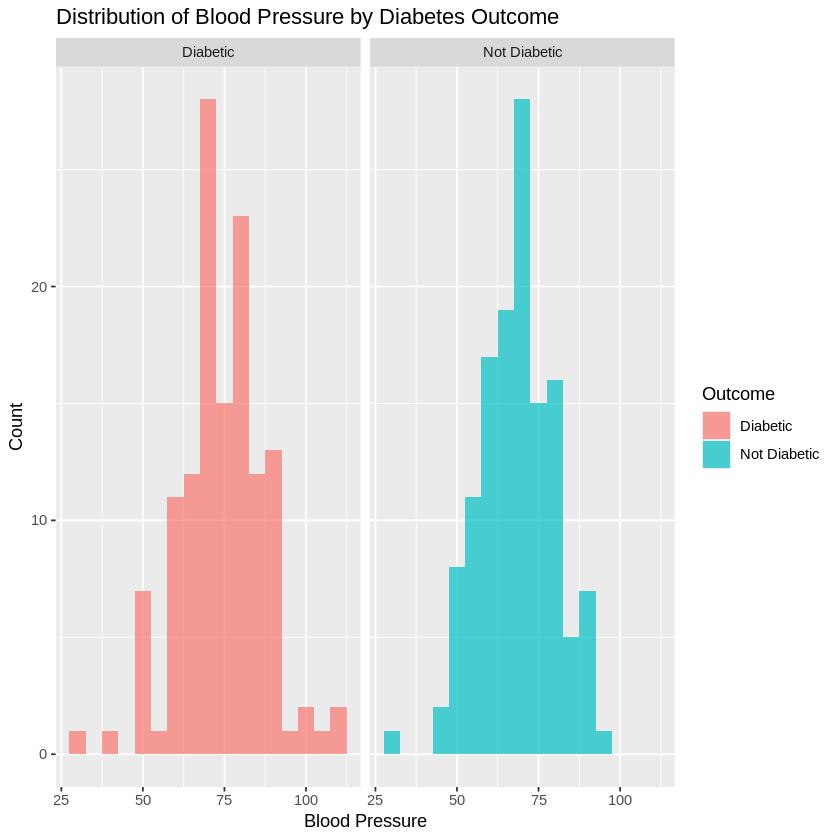

In [ ]:
ggplot(diabetes_data, aes(x = BloodPressure, fill = Outcome)) +
  geom_histogram(binwidth = 5, alpha = 0.7) +
  labs(x = "Blood Pressure", y = "Count", title = "Distribution of Blood Pressure by Diabetes Outcome") +
  facet_wrap(~Outcome)

* The t-test shows if there’s a significant difference in blood pressure between diabetic and non-diabetic individuals.
* Boxplots and histograms indicate that diabetic individuals tend to have slightly higher blood pressure levels.


###2.2.2

In [ ]:
correlation_insulin_bmi <- cor(diabetes_data$Insulin, diabetes_data$BMI)
print(correlation_insulin_bmi)

[1] 0.1886736


`geom_smooth()` using formula = 'y ~ x'


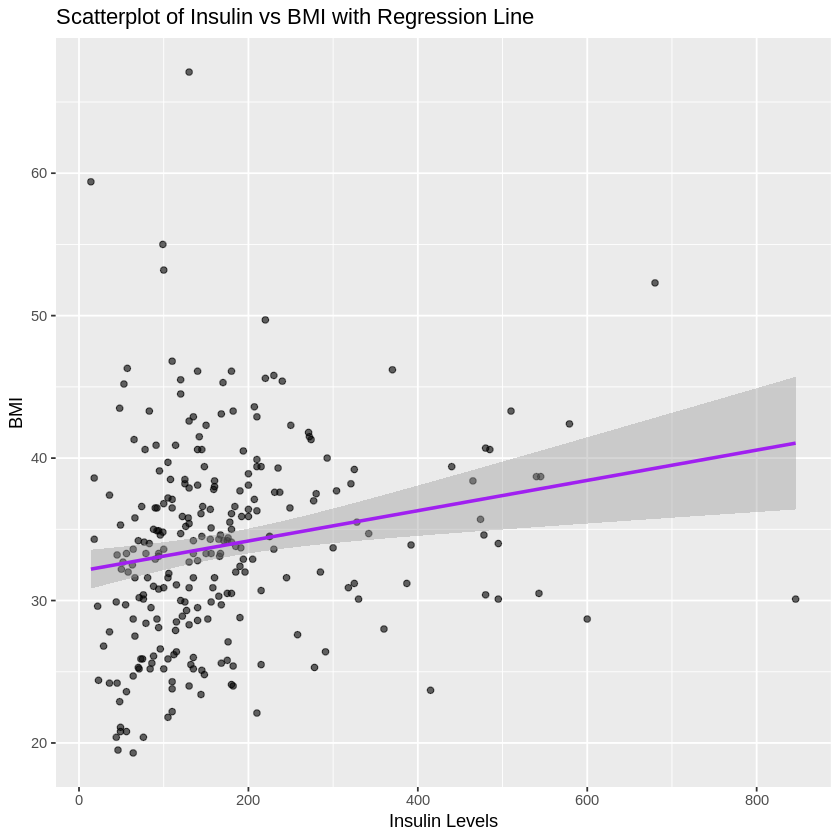

In [ ]:
ggplot(diabetes_data, aes(x = Insulin, y = BMI)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", color = "purple") +
  labs(x = "Insulin Levels", y = "BMI", title = "Scatterplot of Insulin vs BMI with Regression Line")

The postivie correlation shows a moderate relation between the BMI and the insulin levels as also shown by the positive slope of the line but it is not a strong correlation

###2.2.3

`geom_smooth()` using formula = 'y ~ x'


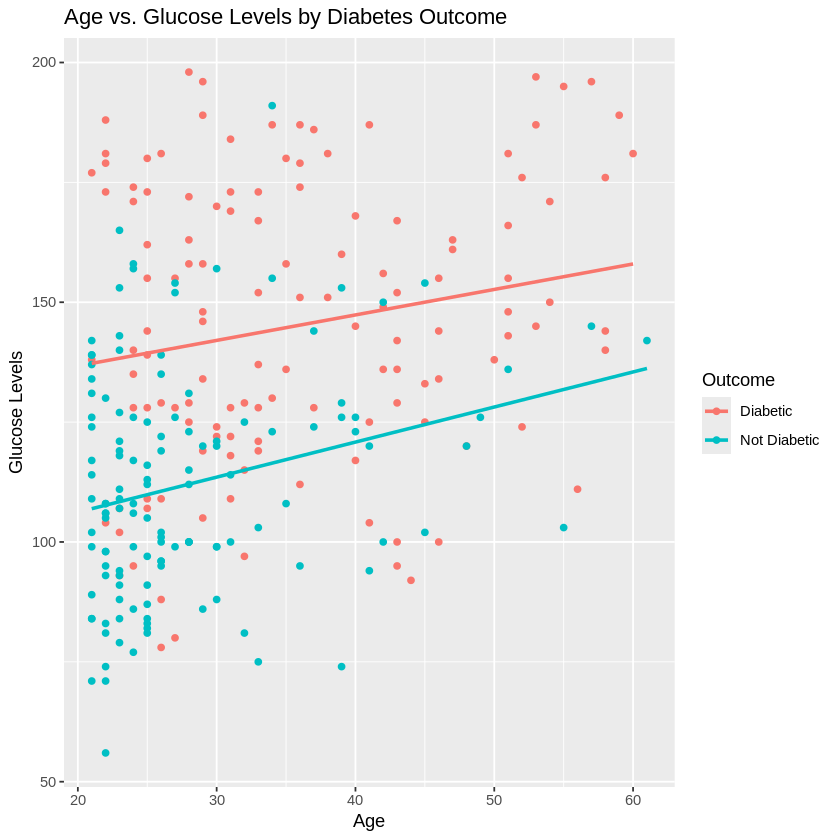

In [ ]:
ggplot(diabetes_data, aes(x = Age, y = Glucose, color = Outcome)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Age vs. Glucose Levels by Diabetes Outcome", x = "Age", y = "Glucose Levels")


`geom_smooth()` using formula = 'y ~ x'


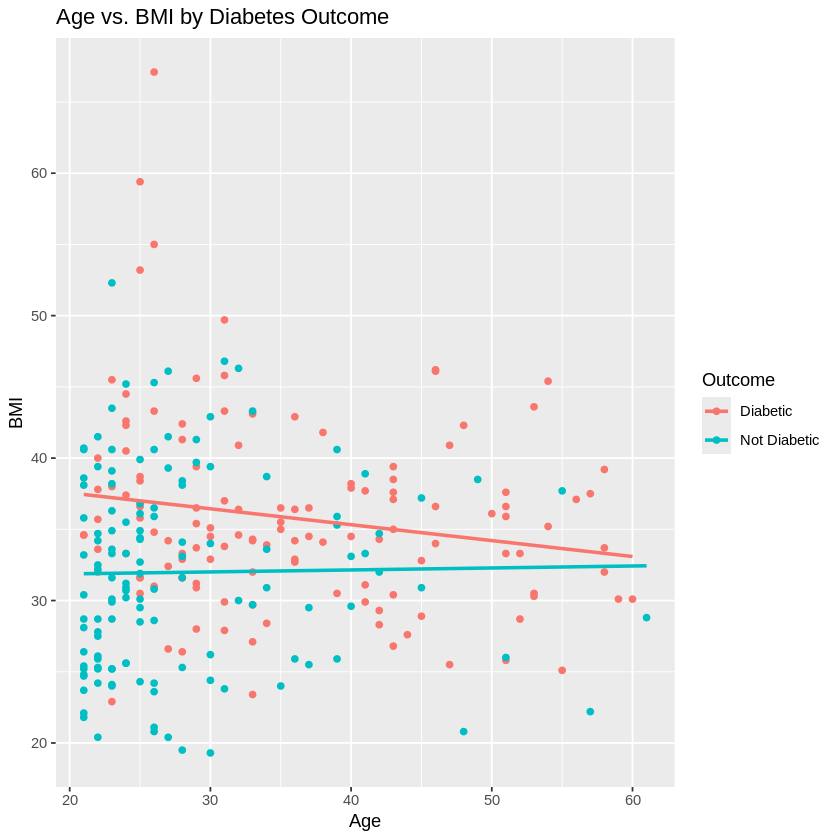

In [ ]:
ggplot(diabetes_data, aes(x = Age, y = BMI, color = Outcome)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Age vs. BMI by Diabetes Outcome", x = "Age", y = "BMI")

* Glucose levels increase with age regardless of them being diabetic or not
* BMI tends to be higher for diabetic patients but decreases slightly with age meanwhile it stays relatively constant for non diabetics

###2.2.4

In [ ]:
t_test_skin <- t.test(diabetes_data$SkinThickness ~ diabetes_data$Outcome)
print(t_test_skin)


	Welch Two Sample t-test

data:  diabetes_data$SkinThickness by diabetes_data$Outcome
t = 3.9229, df = 254.21, p-value = 0.0001126
alternative hypothesis: true difference in means between group Diabetic and group Not Diabetic is not equal to 0
95 percent confidence interval:
 2.493802 7.521583
sample estimates:
    mean in group Diabetic mean in group Not Diabetic 
                  32.96154                   27.95385 



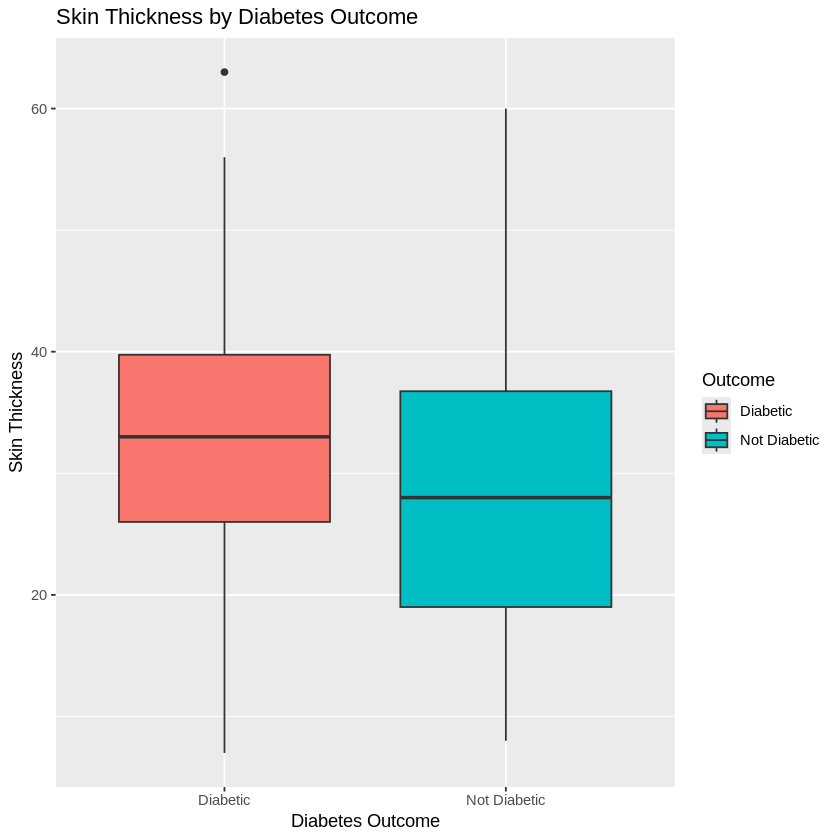

In [ ]:
ggplot(diabetes_data, aes(x = Outcome, y = SkinThickness, fill = Outcome)) +
  geom_boxplot() +
  labs(title = "Skin Thickness by Diabetes Outcome", x = "Diabetes Outcome", y = "Skin Thickness")


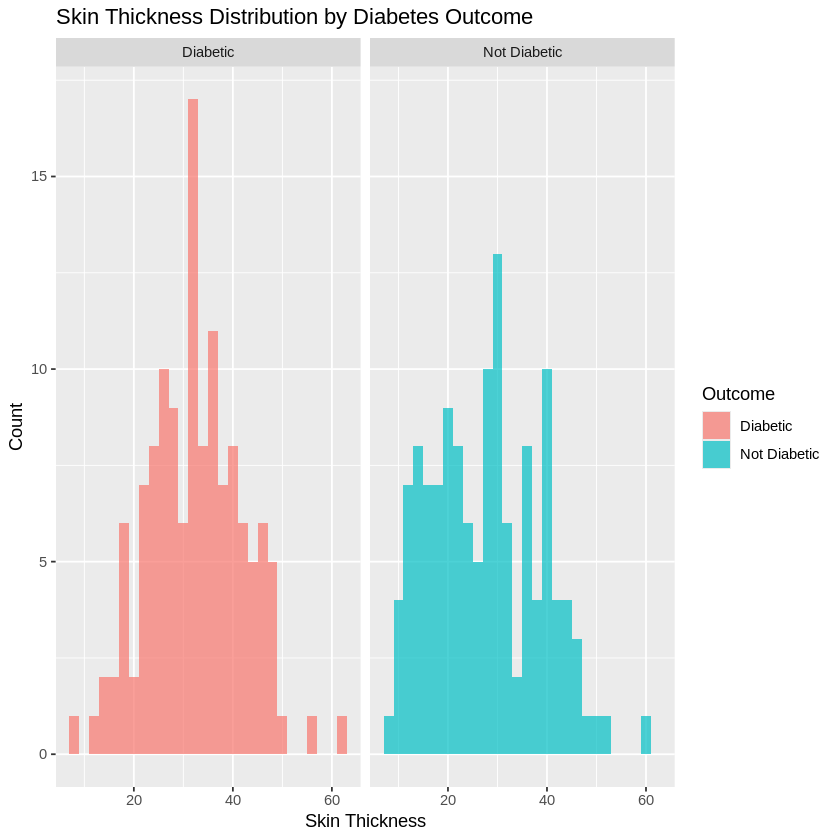

In [ ]:
ggplot(diabetes_data, aes(x = SkinThickness, fill = Outcome)) +
  geom_histogram(binwidth = 2, alpha = 0.7, position = "identity") +
  labs(title = "Skin Thickness Distribution by Diabetes Outcome", x = "Skin Thickness", y = "Count") +
  facet_wrap(~Outcome)

* Diabetic individuals show higher skin thicjness on average this might be due to health issues such as fat distribution etc...
* the non diabetics histogram shows that it is more left skewed compared to the diabetic one showing that non diabetic patients have lower skin thickness
* the box plot also signifies this observation showing a higher IQR for the diabetic patients

###2.2.5

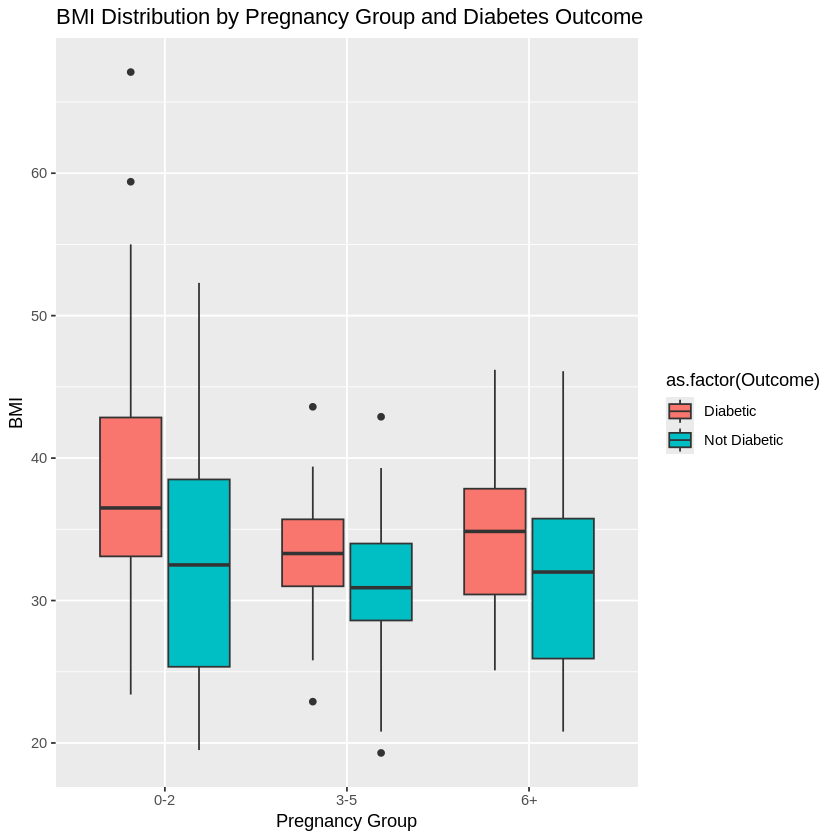

In [ ]:
ggplot(diabetes_data, aes(x = PregnancyGroup, y = BMI, fill = as.factor(Outcome))) +
  geom_boxplot() +
  labs(x = "Pregnancy Group", y = "BMI", title = "BMI Distribution by Pregnancy Group and Diabetes Outcome")

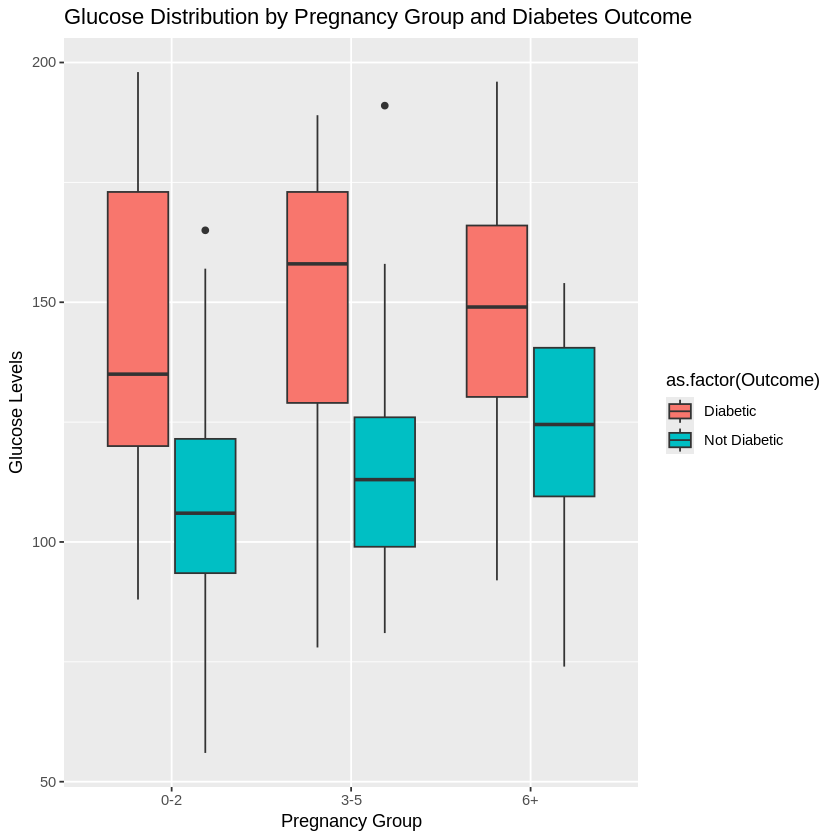

In [ ]:
ggplot(diabetes_data, aes(x = PregnancyGroup, y = Glucose, fill = as.factor(Outcome))) +
  geom_boxplot() +
  labs(x = "Pregnancy Group", y = "Glucose Levels", title = "Glucose Distribution by Pregnancy Group and Diabetes Outcome")


Diabetic individuals consistently show higher BMI and glucose levels across all pregnancy groups compared to non-diabetics. These trends suggest that frequent pregnancies, combined with elevated BMI and glucose, increase diabetes risk.

# **PART 3: Hypothesis Testing:**

## **3.1 Formulate a hypothesis test to assess the validity of this claim given the available data:**
1. State the test you will use and justify your choice.
2. Clearly state the hypotheses.
3. Conduct the test and report the result.
4. Make a conclusion as to the validity of the claim, assume a significance level of 0.05.


### **3.1**
**Claim + Hypothesis**:
There is a significant difference in glucose levels between diabetic and non-diabetic patients.

**Justification**:
- using independent t-test to compare the mean glucose levels between two BMI groups ("Obese", "non-Obese").
- since the depenent variable **Glucose** is continous and the independent variable **BMI** is categorical, the t-test is an appropriate test to use.

In [ ]:
diabetes_data_p3 <- read_csv("diabetes.csv") %>%
  mutate(across(everything(), as.numeric)) %>%
  mutate(diabetes_status = ifelse(Outcome == 1, "Diabetic", "Non-diabetic"))

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
diabetes_data_p3

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,diabetes_status
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
6,148,72,35,0,33.6,0.627,50,1,Diabetic
1,85,66,29,0,26.6,0.351,31,0,Non-diabetic
8,183,64,0,0,23.3,0.672,32,1,Diabetic
1,89,66,23,94,28.1,0.167,21,0,Non-diabetic
0,137,40,35,168,43.1,2.288,33,1,Diabetic
5,116,74,0,0,25.6,0.201,30,0,Non-diabetic
3,78,50,32,88,31.0,0.248,26,1,Diabetic
10,115,0,0,0,35.3,0.134,29,0,Non-diabetic
2,197,70,45,543,30.5,0.158,53,1,Diabetic


In [ ]:
diabetes_glucose_box <- create_boxplot(
  diabetes_data_p3,
  "diabetes_status",
  "Glucose",
  "Glucose Levels by Diabetes Status"
)# Create boxplot for glucose levels by diabetes status

# Create QQ plot to check normality of glucose levels for each diabetes status group
qq_plot <- create_qq_plot(
  diabetes_data_p3, "Glucose", "diabetes_status"
)

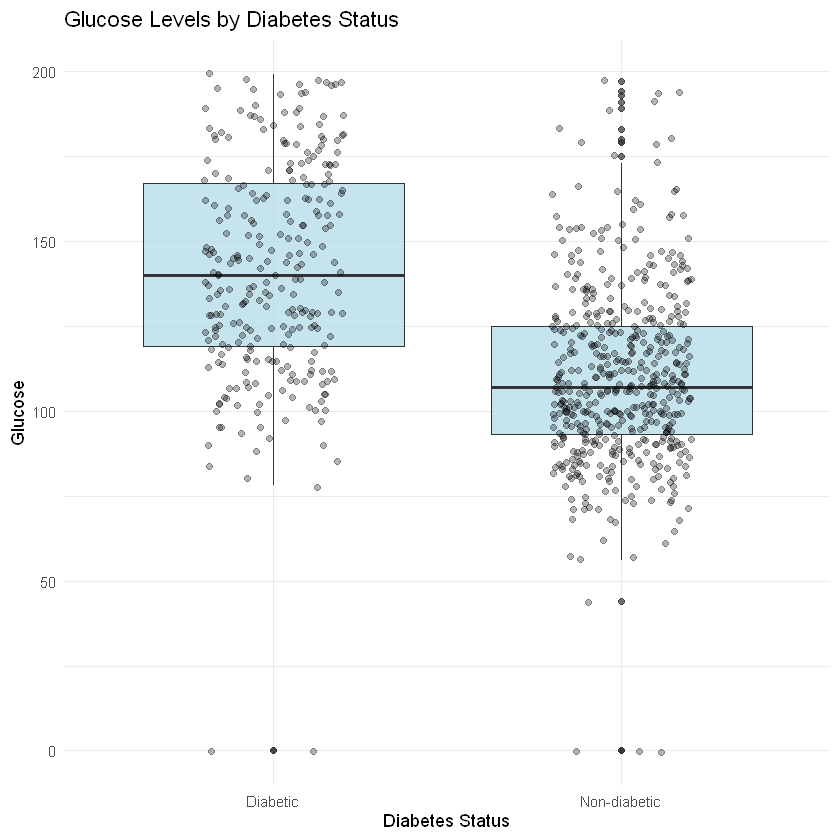

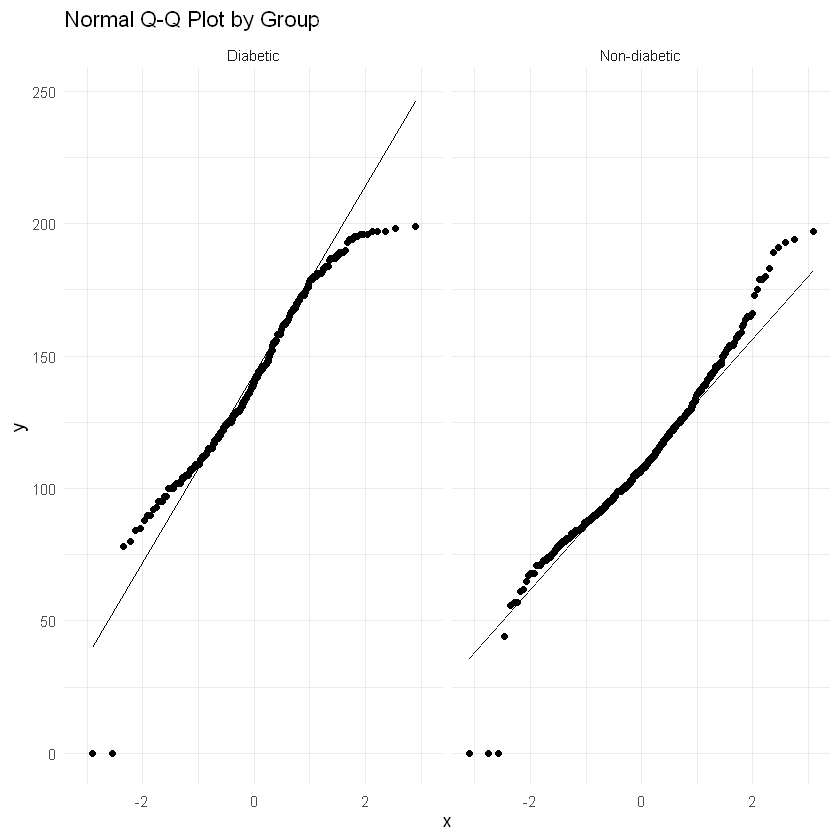

In [ ]:
diabetes_glucose_box

qq_plot

### **Stating Hypothesis**

**Null Hypothesis**: H<sub>0</sub>: μ<sub>*diabetic*</sub> = μ<sub>*non-diabetic*</sub> --> There is no significant difference in glucose levels between diabetic and non-diabetic patients.

**Alternative Hypothesis**: H<sub>1</sub>: μ<sub>*diabetic*</sub> ≠ μ<sub>*non-diabetic*</sub> --> There is a significant difference in glucose levels between diabetic and non-diabetic patients.

In [ ]:
t_test_result <- t.test(Glucose ~ diabetes_status, data = diabetes_data_p3)

## **3.2 Come up with your own claim from the available data and conduct a hypothesis test for it following in the same steps.**


### **3.2**
**Claim + Hypothesis**: patients with high blood pressure are diabetic.

**Justification**:
- using t-test to assess the association between continuous variable **BloodPressure** and categorical variable **Outcome**.
- since the dependent variable **BloodPressure** is continuous and the independent variable **Outcome** is categorical, the t-test is an appropriate test to use.

In [ ]:
# bp_test_data <- diabetes_data3 %>%
#   mutate(diabetes_status = ifelse(Outcome == 1, "Diabetic", "Non-diabetic"))

In [ ]:
bp_box <- create_boxplot(
  diabetes_data_p3,
  "diabetes_status",
  "BloodPressure",
  "Blood Pressure by Diabetes Status"
) # Boxplot of Blood Pressure by Diabetes Status for normality check
bp_qq <- create_qq_plot(
  diabetes_data_p3, "BloodPressure", "diabetes_status"
) # QQ plot of Blood Pressure by Diabetes Status for variance check

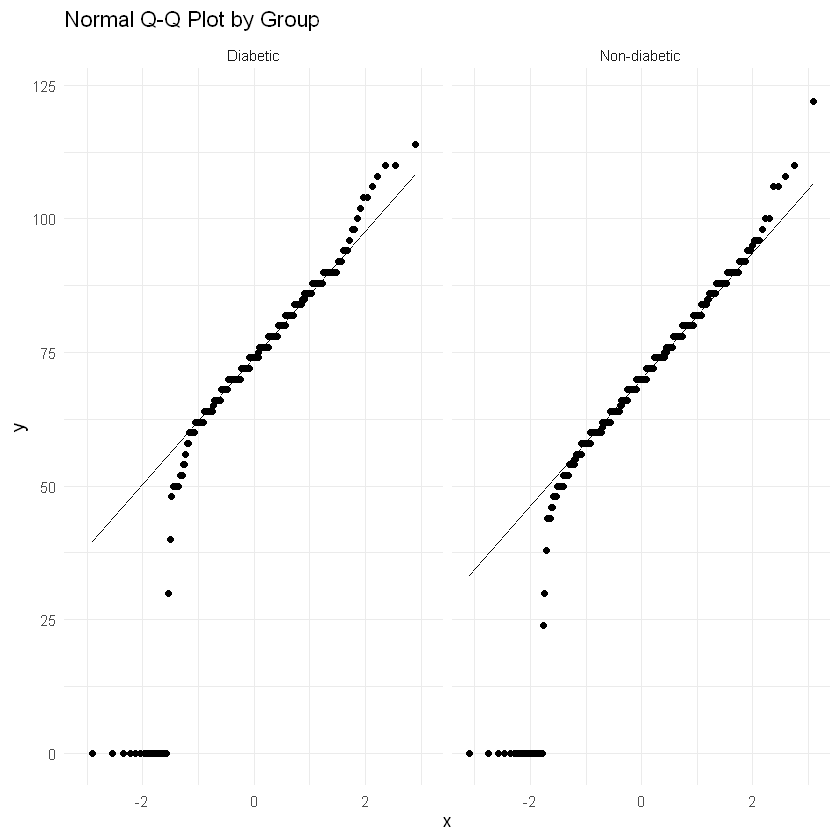

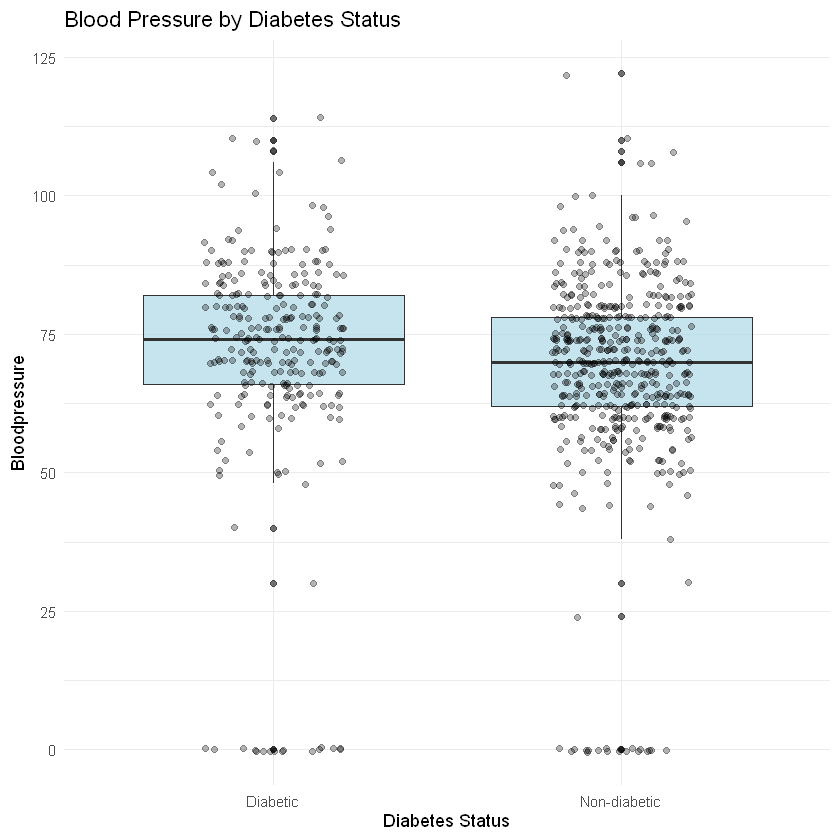

In [ ]:
bp_qq

bp_box

### **Stating Hypothesis**

**Null Hypothesis**: H<sub>0</sub>: μ<sub>*diabetic*</sub> = μ<sub>*non-diabetic*</sub> --> (There is no difference in blood pressure between diabetic and non-diabetic patients).

**Alternative Hypothesis**: H<sub>1</sub>: μ<sub>*diabetic*</sub> > μ<sub>*non-diabetic*</sub> --> (Patients with high blood pressure are diabetic).

In [ ]:
bp_t_test <- t.test(BloodPressure ~ diabetes_status, data = diabetes_data_p3)

## **Reporting results of **3.1** and **3.2** hypothesis tests.**

In [ ]:
print_results(t_test_result = t_test_result, bp_t_test = bp_t_test)


=== BMI and Glucose Level Analysis ===

	Welch Two Sample t-test

data:  Glucose by diabetes_status
t = 13.752, df = 461.33, p-value < 2.2e-16
alternative hypothesis: true difference in means between group Diabetic and group Non-diabetic is not equal to 0
95 percent confidence interval:
 26.80786 35.74707
sample estimates:
    mean in group Diabetic mean in group Non-diabetic 
                  141.2575                   109.9800 


=== Blood Pressure and Diabetes Status Analysis ===

	Welch Two Sample t-test

data:  BloodPressure by diabetes_status
t = 1.7131, df = 471.31, p-value = 0.08735
alternative hypothesis: true difference in means between group Diabetic and group Non-diabetic is not equal to 0
95 percent confidence interval:
 -0.388326  5.669580
sample estimates:
    mean in group Diabetic mean in group Non-diabetic 
                  70.82463                   68.18400 



In [ ]:
# interpretation for diabetes-glucose test
diabetes_glucose_interpretation <- interpret_hypothesis_test(t_test_result)

# interpretation for Blood Pressure-Diabetes test
bp_diabetes_interpretation <- interpret_hypothesis_test(bp_t_test)

In [ ]:
create_report(
  diabetes_glucose_interpretation = diabetes_glucose_interpretation,
  bp_diabetes_interpretation = bp_diabetes_interpretation
)


=== Hypothesis Testing Results ===

1. BMI and Glucose Levels:
   -  Reject the null hypothesis 
   - P-value: < 2.22e-16 
   - 95% CI: 26.81 to 35.75 

2. Blood Pressure and Diabetes Status:
   -  Fail to reject the null hypothesis 
   - P-value: 0.087354 
   - 95% CI: -0.39 to 5.67 


# **PART 4: Simulation Task:**

## **4.1 Take 25 Random Samples of Size 15 from the Dataset**

1. Select a relevant column from the dataset (e.g., Glucose, BMI, or Age).
2. Generate 25 random samples, each containing 15 data points, from the selected column.
3. For each sample, compute the mean and then calculate the 95% confidence interval for the sample mean.
4. From your output, determine the proportion of these 25 confidence intervals that contain the true population mean of the selected column (e.g., mean glucose or BMI).


## 4.2 **Increase the Sample Size to 100**
1. Now, take 25 random samples, each with a sample size of 100, from the same column you selected in part (a)..
2. For each sample, compute the mean and calculate the 95% confidence intervals.
3. Observe the following:
    * Does the width of the confidence intervals increase or decrease?
    * Does increasing the sample size result in more or fewer intervals containing the true population mean?
4. Compare your findings with actual computations and interpret the results.


## **4.3 Take 20 Random Samples of Size 10 from the Dataset**
1. Finally, generate 20 random samples, each with a sample size of 10, from the same selected column in the dataset.
2. For each sample, compute the mean and determine the 95% confidence intervals.
3. Evaluate the coverage proportion and analyze the relationship between sample size and the accuracy of confidence intervals.
